<a href="https://colab.research.google.com/github/heungsikyu/colab-study/blob/master/graph_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

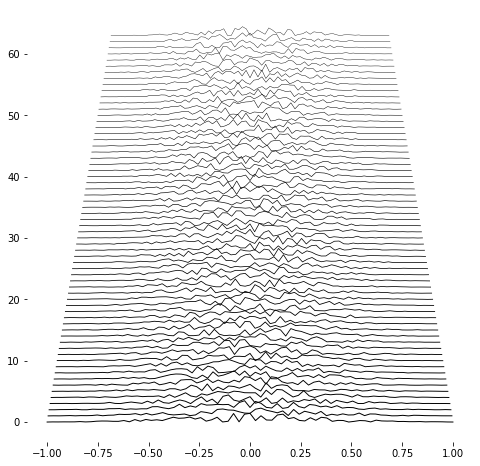

In [10]:
import numpy as np

data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X ** 2)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, frameon=False)
lines = []
for i in range(data.shape[0]):
    xscale = 1 - i / 200.0
    lw = 1 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="k", lw=lw)
    lines.append(line)

In [11]:
import matplotlib.animation as animation
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes, ha="right", va="bottom", color="k", 
        family="sans-serif", fontweight="bold", fontsize=16)
ax.text(0.5, 1.0, "DYNAMIC", transform=ax.transAxes, ha="left", va="bottom", color="k",
        family="sans-serif", fontweight="light", fontsize=20)
def update(*args):
    data[:, 1:] = data[:, :-1]
    data[:, 0] = np.random.uniform(0, 1, len(data))
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])
anim = animation.FuncAnimation(fig, update, interval=200)
plt.show()

In [12]:
from IPython.display import HTML

ani = animation.FuncAnimation(fig, update, 19, interval=400, blit=False)
HTML(ani.to_html5_video())